In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [3]:
#Creat data
data = {
    'beta': np.random.beta(5, 1, 1000) * 60,
    'exponential': np.random.exponential(10, 1000),
    'normal_p': np.random.normal(10, 2, 1000),
    'normal_l': np.random.normal(10, 10, 1000),   
}
df = pd.DataFrame(data)

In [4]:
first_half = np.random.normal(20, 3, 500)
second_half = np.random.normal(-20, 3, 500)
bimodal = np.concatenate([first_half, second_half])

In [5]:
df['bimodal'] = bimodal

In [6]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,59.642314,1.425747,10.368576,2.943651,23.214653
1,52.576942,33.632778,10.219163,-3.681957,15.347442
2,56.936195,11.472154,11.809303,13.642774,14.015051
3,57.427617,9.268584,9.459630,2.117018,21.353645
4,56.923796,8.791014,10.693763,10.890224,24.640571


<AxesSubplot:ylabel='Density'>

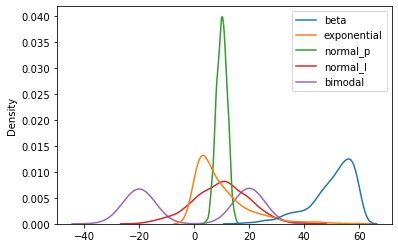

In [7]:
sns.kdeplot(data=df)

<AxesSubplot:>

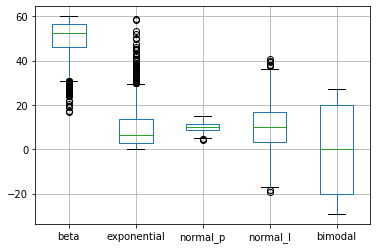

In [8]:
df.boxplot()

In [10]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.106156,9.722277,10.001701,9.910509,-0.053951
std,8.290673,9.717457,1.891045,10.037159,20.251030
min,16.950781,0.006123,4.236941,-19.245787,-29.137122
25%,46.191648,2.702539,8.641615,3.270048,-20.018219
50%,52.402816,6.623018,10.040265,10.142994,0.129002
75%,56.351449,13.486392,11.296892,16.791622,19.812052
max,59.989352,58.926337,15.041382,40.530824,27.353153


In [11]:
#Add very big data
normal_big = np.random.normal(1000000, 10000, (1000, 1))
df['normal_big'] = normal_big

In [12]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,59.642314,1.425747,10.368576,2.943651,23.214653,9.998371e+05
1,52.576942,33.632778,10.219163,-3.681957,15.347442,9.957525e+05
2,56.936195,11.472154,11.809303,13.642774,14.015051,9.857895e+05
3,57.427617,9.268584,9.459630,2.117018,21.353645,1.008441e+06
4,56.923796,8.791014,10.693763,10.890224,24.640571,1.017351e+06


<AxesSubplot:ylabel='Density'>

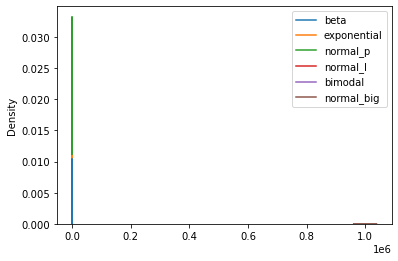

In [13]:
sns.kdeplot(data=df)

<AxesSubplot:>

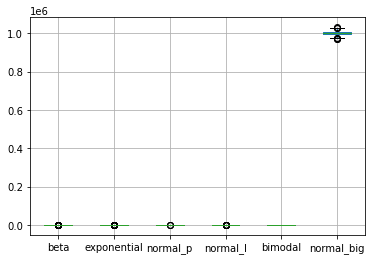

In [14]:
df.boxplot()

In [15]:
scaler = RobustScaler()

In [16]:
df_s = scaler.fit_transform(df)

In [17]:
col_names = df.columns.tolist()
col_names

['beta', 'exponential', 'normal_p', 'normal_l', 'bimodal', 'normal_big']

In [18]:
df_s = pd.DataFrame(df_s, columns=col_names)

In [19]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.712563,-0.481949,0.123645,-0.532434,0.579601,-0.019480
1,0.017139,2.504648,0.067375,-1.022436,0.382082,-0.326272
2,0.446207,0.449666,0.666235,0.258829,0.348631,-1.074588
3,0.494577,0.245327,-0.218672,-0.593568,0.532877,0.626729
4,0.444987,0.201041,0.246113,0.055262,0.615401,1.295946


<AxesSubplot:ylabel='Density'>

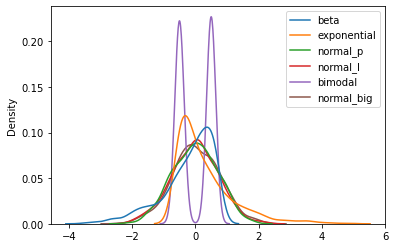

In [20]:
sns.kdeplot(data=df_s)

<AxesSubplot:>

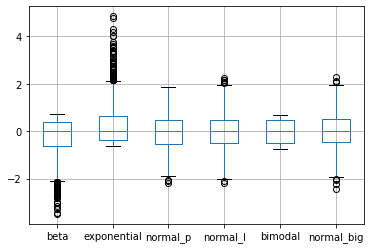

In [21]:
df_s.boxplot()

In [22]:
mins = [df[col].min() for col in col_names]
mins

[16.950780989875017,
 0.0061231798044816136,
 4.236940615903928,
 -19.24578703094481,
 -29.13712176482347,
 967880.1519793331]

In [23]:
maxs = [df[col].max() for col in col_names]
maxs

[59.9893520430493,
 58.926337216451046,
 15.04138230660784,
 40.53082357421184,
 27.353153331013438,
 1030697.5847320592]

In [24]:
mins_s = [df_s[col].min() for col in col_names]
mins_s

[-3.489441674938414,
 -0.6135928272829889,
 -2.185581682216261,
 -2.173473312266279,
 -0.734770891803345,
 -2.419743208748389]

In [25]:
maxs_s = [df_s[col].max() for col in col_names]
maxs_s

[0.7467208309863576,
 4.850151498131922,
 1.8834639576704129,
 2.247358876231494,
 0.6835040266415177,
 2.298422490071685]